In [2]:
# import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
#import the dataset
baseball = pd.read_csv("dodgers.csv")

In [3]:
baseball.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
baseball.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [5]:
# I am going to drop the skies column as we would have no way to know or predict that for a specific day
baseball = baseball.drop(columns=['skies'])

#### Before breaking the attendance down, I would like to look at an overall histogram of attendance

array([[<AxesSubplot:title={'center':'attend'}>]], dtype=object)

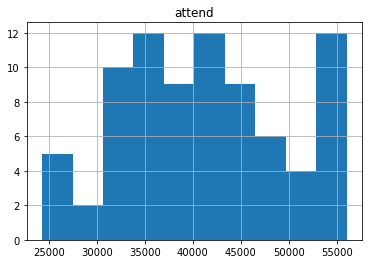

In [6]:
baseball.hist(column='attend')

#### Most of the attendance falls between 30,000 - 50,000 with the highest nubers around 55,000 and the low end being 25,000.

<AxesSubplot:xlabel='temp', ylabel='attend'>

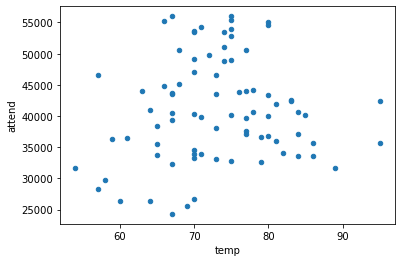

In [7]:
# Although we can't predict a specific temp for a day, we could potentially use average 
# temps to determine a month or week, so I will look at how attendance and temp correlate
baseball.plot.scatter('temp', 'attend')

#### The highest attendance is when temps are in the 70-80 degree range

#### Now I will plot attendance per days of the week

<AxesSubplot:title={'center':'attend'}, xlabel='day_of_week'>

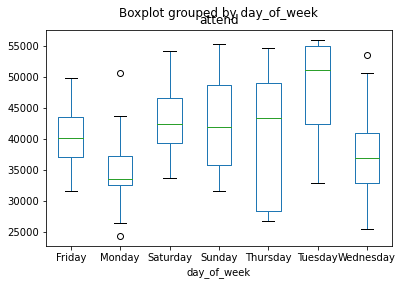

In [8]:
# plot attendance by day of week
baseball.boxplot(by ='day_of_week', column =['attend'], grid = False)

#### I would like to make this a bit easier to read by ordering the days 

In [9]:
# create order for days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']    

<AxesSubplot:xlabel='day_of_week', ylabel='attend'>

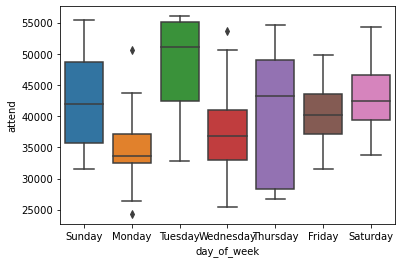

In [10]:
# rerun the plot with days in order
import seaborn as sns
sns.boxplot(x=baseball.day_of_week, y=baseball.attend, order=day_order)

#### The highest attendance is recorded on Tuesdays with Mondays having low attendance

#### I feel as though attendance would be impacted by who the opponent is, so I will plot opponent to attendance

[Text(0, 0, 'Pirates'),
 Text(1, 0, 'Padres'),
 Text(2, 0, 'Braves'),
 Text(3, 0, 'Nationals'),
 Text(4, 0, 'Giants'),
 Text(5, 0, 'Rockies'),
 Text(6, 0, 'Snakes'),
 Text(7, 0, 'Cardinals'),
 Text(8, 0, 'Astros'),
 Text(9, 0, 'Brewers'),
 Text(10, 0, 'Angels'),
 Text(11, 0, 'White Sox'),
 Text(12, 0, 'Mets'),
 Text(13, 0, 'Reds'),
 Text(14, 0, 'Phillies'),
 Text(15, 0, 'Cubs'),
 Text(16, 0, 'Marlins')]

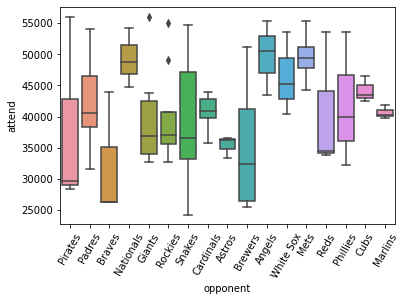

In [11]:
# plot attendance by opponent
import seaborn as sns
opponent = sns.boxplot(x=baseball.opponent, y=baseball.attend)
opponent.set_xticklabels(opponent.get_xticklabels(),rotation = 60)


#### It does appear that there are higher attendance numbers while playing the Pirates and Giants and very low attendance numbers when playing the Braves, Brewers and Snakes.  I'm not sure that this will really be useful though if we are simply looking for a day without knowing the schedule and who they would be playing.  This would be valuable information to know prior to making a final decision.

#### I would like to create a new column that simply identifies if the game had a promotion or not, I will call it promo_game with a YES/NO value.  I will then add another column to identify in one column which promo (if any) was run.

In [12]:
# create new column promo_game
baseball['promo_game'] = baseball[['cap','shirt','fireworks','bobblehead']].max(axis=1)

In [13]:
conditions = [
    (baseball['cap'] == 'YES'),
    (baseball['shirt'] == 'YES'), 
    (baseball['fireworks'] == 'YES') ,
    (baseball['bobblehead'] == 'YES')
    ]

# create a list of the values we want to assign for each condition
values = ['cap', 'shirt', 'fireworks', 'bobblehead']

# create a new column and use np.select to assign values to it using our lists as arguments
baseball['promo'] = np.select(conditions, values)
baseball['promo'] = baseball['promo'].replace(['0'],['none'])

# display updated DataFrame
baseball.head()

,month,day,attend,day_of_week,opponent,temp,day_night,cap,shirt,fireworks,bobblehead,promo_game,promo
0,APR,10,56000,Tuesday,Pirates,67,Day,NO,NO,NO,NO,NO,none
1,APR,11,29729,Wednesday,Pirates,58,Night,NO,NO,NO,NO,NO,none
2,APR,12,28328,Thursday,Pirates,57,Night,NO,NO,NO,NO,NO,none
3,APR,13,31601,Friday,Padres,54,Night,NO,NO,YES,NO,YES,fireworks
4,APR,14,46549,Saturday,Padres,57,Night,NO,NO,NO,NO,NO,none


#### I would like to plot attendance for promo vs non-promo games and then also plot attendance per type of promo

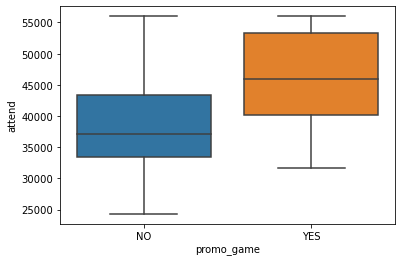

In [14]:
# plot attendance for promo_game vs non promo-game
promo_attend = sns.boxplot(x=baseball.promo_game, y=baseball.attend)

<AxesSubplot:xlabel='promo', ylabel='attend'>

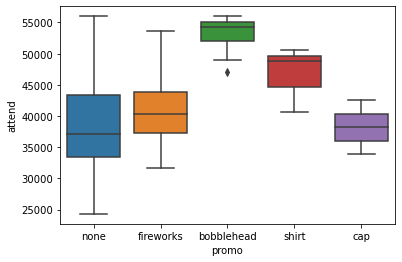

In [15]:
# plot attendance per promo type
sns.boxplot(x='promo', y='attend', data=baseball)

#### We can see that the promotions do have a positive affect on attendance with bobbleheads clearly having the largest correlation to higher attendance

#### I would like to now look at attendance by month and day of the week together

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


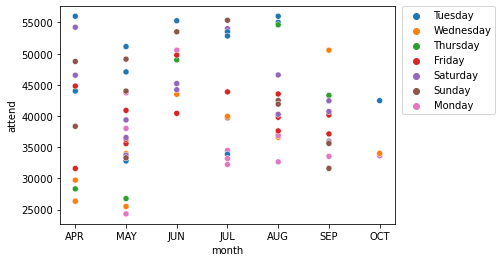

In [16]:
# plot attendance by month and day of week
import seaborn as sns
sns.scatterplot('month', 'attend', data=baseball, hue='day_of_week')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#### We can see again that Tuesdays have high attendance days, the lowest attendance days are seen in April and May with Mondays and Wednesdays have lower numbers, especially in those months. This made me interested to see what days promos were run, so I plotted each promo type with the day of the week against attendance.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


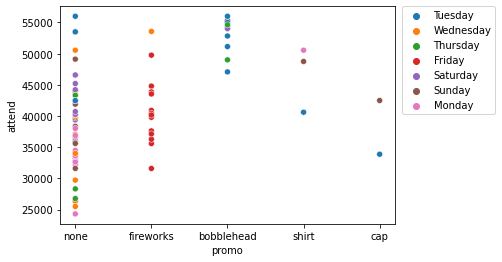

In [17]:
# plot attendance by promo and day of week
import seaborn as sns
sns.scatterplot('promo', 'attend', data=baseball, hue='day_of_week')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### We can see again that bobblehead games had high attendance, and most of those were Tuesdays and Thursdays, which could be related to Tuesdays having the highest numbers that we saw earlier.  Also, there are not a lot of promotions on Mondays, which we previously noted had low attendance.

#### Now I will run a linear regression with attendance as the dependent variable and month, day of the week and each promotion types as predictor variables.  

In [18]:
model = sm.GLM.from_formula("attend ~ month + day_of_week + cap + shirt + fireworks + bobblehead", data=baseball)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 attend   No. Observations:                   81
Model:                            GLM   Df Residuals:                       64
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                      3.3007e+07
Method:                          IRLS   Log-Likelihood:                -806.54
Date:                Mon, 28 Jun 2021   Deviance:                   2.1125e+09
Time:                        00:55:37   Pearson chi2:                 2.11e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.223e+04   6583.340      3.377      0.001    9329.675    3.51e+04
month[T.AUG]              3341.0703   2304.295      1.450      0.147   -1175.265    7857.406
month[T.JUL]              2564.2583   2555.919      1.003      0.316   -2445.252    7573.768
month[T.JUN]              6933.3521   2573.781      2.694      0.007    1888.835     1.2e+04
month[T.MAY]             -1924.7543   2175.756     -0.885      0.376   -6189.158    2339.649
month[T.OCT]               221.8223   3825.941      0.058      0.954   -7276.884    7720.529
month[T.SEP]              -102.9399   2367.346     -0.043      0.965   -4742.852    4536.972
day_of_week[T.Monday]     1.093e+04   6802.780      1.607      0.108   -2401.773    2.43e+04
day_of_week[T.Saturday]   1.788e+04   6658.360      2.686      0.007    4833.815    3.09e+04
day_of_week[T.Sunday]     1.823e+04   6712.865      2.715      0.007    5068.239    3.14e+04
day_of_week[T.Thursday]   1.225e+04   6947.409      1.763      0.078   -1371.459    2.59e+04
day_of_week[T.Tuesday]    1.935e+04   6811.893      2.841      0.004    6000.942    3.27e+04
day_of_week[T.Wednesday]  1.246e+04   6241.486      1.997      0.046     230.656    2.47e+04
cap[T.YES]               -5784.5577   4467.996     -1.295      0.195   -1.45e+04    2972.554
shirt[T.YES]              5964.5286   3633.482      1.642      0.101   -1156.965    1.31e+04
fireworks[T.YES]          1.631e+04   6268.591      2.602      0.009    4023.002    2.86e+04
bobblehead[T.YES]          1.07e+04   2346.479      4.560      0.000    6101.130    1.53e+04
============================================================================================
"""

#### I also want to see the linear regression with month and day of the week without the impact of current promotions

In [19]:
model = sm.GLM.from_formula("attend ~ month + day_of_week", data=baseball)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 attend   No. Observations:                   81
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                      4.7708e+07
Method:                          IRLS   Log-Likelihood:                -823.91
Date:                Mon, 28 Jun 2021   Deviance:                   3.2442e+09
Time:                        00:55:38   Pearson chi2:                 3.24e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.805e+04   2661.948     14.293      0.000    3.28e+04    4.33e+04
month[T.AUG]              3965.9784   2681.525      1.479      0.139   -1289.714    9221.670
month[T.JUL]              4768.3867   2868.802      1.662      0.096    -854.361    1.04e+04
month[T.JUN]              8753.4054   3057.367      2.863      0.004    2761.076    1.47e+04
month[T.MAY]             -1957.7296   2583.531     -0.758      0.449   -7021.358    3105.899
month[T.OCT]             -1500.1929   4561.773     -0.329      0.742   -1.04e+04    7440.717
month[T.SEP]              -692.4947   2839.495     -0.244      0.807   -6257.803    4872.814
day_of_week[T.Monday]    -4991.2625   2826.580     -1.766      0.077   -1.05e+04     548.733
day_of_week[T.Saturday]   3314.3441   2717.208      1.220      0.223   -2011.286    8639.975
day_of_week[T.Sunday]     2816.8071   2727.510      1.033      0.302   -2529.015    8162.629
day_of_week[T.Thursday]    347.0261   3643.149      0.095      0.924   -6793.415    7487.468
day_of_week[T.Tuesday]    7931.2545   2762.345      2.871      0.004    2517.157    1.33e+04
day_of_week[T.Wednesday] -2468.0392   2805.030     -0.880      0.379   -7965.797    3029.719
============================================================================================
"""

#### Looking at the p values in both of these models, we can see that September has the highest p value, indicating that the month of September does not have a strong correlation to higher attendance numbers.  Looking at the days of the week, in the model with the promotions included, Mondays had the least positive correlation. However, when removing current promotions, we see that Thursday has lower correlation.  I looked at the data specifically for Thursday and discovered that there were only 4 Thursday games and 2 of the 4 had a bobblehead promotion, which we have seen has a strong relationship to higher attendance, so that explains the difference in the p value when including the bobblehead promotion vs not including it.  Based on this analysis, I would conclude that a Thursday game in the month of September would be the best time to run a marketing promotion.